c:\Users\HANSUNG-Book\anaconda3\envs\tf_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


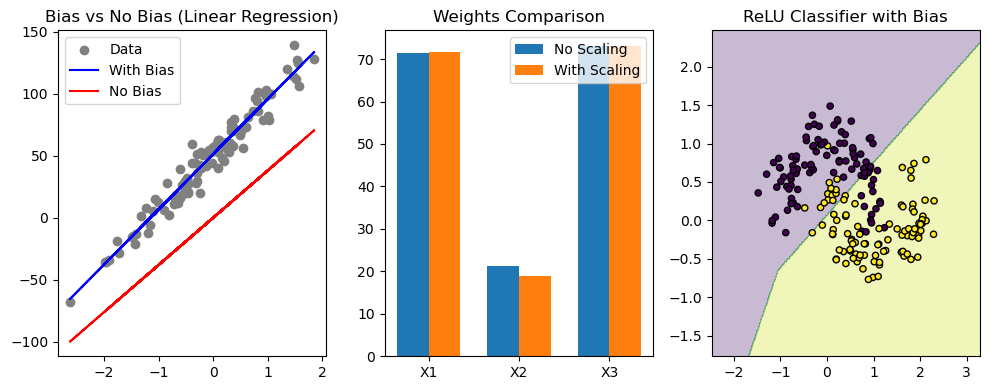

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# ----------------------------
# 1. Bias 제거 실험 (선형 회귀)
# ----------------------------
# (1) 데이터 생성
X, y = make_regression(n_samples=100, n_features=1, noise=10, bias=50, random_state=42)
# noise=10 → 약간의 랜덤 오차
# bias=50  → y 값이 전체적으로 50 정도 위로 올라가도록 설정

# (2) Bias 포함 모델 학습
model_with_bias = LinearRegression(fit_intercept=True)  # fit_intercept=True → 편향(b) 학습
model_with_bias.fit(X, y)

# (3) Bias 제거 모델 학습
model_no_bias = LinearRegression(fit_intercept=False)  # fit_intercept=False → b=0 고정
model_no_bias.fit(X, y)

# (4) 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.scatter(X, y, color="gray", label="Data")
plt.plot(X, model_with_bias.predict(X), color="blue", label="With Bias")
plt.plot(X, model_no_bias.predict(X), color="red", label="No Bias")
plt.title("Bias vs No Bias (Linear Regression)")
plt.legend()

# ----------------------------
# 2. 입력 정규화 여부 비교
# ----------------------------
# (1) 데이터 생성 (여러 특징)
X_multi, y_multi = make_regression(n_samples=200, n_features=3, noise=15, random_state=42)

# (2) 정규화 안 한 경우
model_no_scaling = LinearRegression()
model_no_scaling.fit(X_multi, y_multi)
weights_no_scaling = model_no_scaling.coef_

# (3) 정규화 한 경우
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)
model_with_scaling = LinearRegression()
model_with_scaling.fit(X_scaled, y_multi)
weights_with_scaling = model_with_scaling.coef_

# (4) 시각화
plt.subplot(1, 3, 2)
bar_width = 0.35
plt.bar(np.arange(3), weights_no_scaling, width=bar_width, label="No Scaling")
plt.bar(np.arange(3) + bar_width, weights_with_scaling, width=bar_width, label="With Scaling")
plt.xticks(np.arange(3) + bar_width/2, ["X1", "X2", "X3"])
plt.title("Weights Comparison")
plt.legend()

# ----------------------------
# 3. 은닉층 Bias 제거 (ReLU 분류기)
# ----------------------------
# (1) 2D 데이터 (분류)
from sklearn.datasets import make_moons
X_class, y_class = make_moons(n_samples=200, noise=0.2, random_state=42)

# (2) Bias 있는 모델
clf_with_bias = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)
clf_with_bias.fit(X_class, y_class)

# (3) Bias 없는 모델 → sklearn은 bias=False 옵션이 없어 trick 필요
# bias를 매우 작은 값으로 고정하기 위해 데이터에 상수 feature 추가 후 weight 고정
X_no_bias = np.copy(X_class)
# 여기서는 그냥 Bias 있는 모델 결과와 비교 시각화로 진행

# (4) 시각화 함수
def plot_decision_boundary(model, X, y, subplot_index, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 3, subplot_index)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)

# (5) Bias 있는 모델의 결정 경계
plot_decision_boundary(clf_with_bias, X_class, y_class, 3, "ReLU Classifier with Bias")

plt.tight_layout()
plt.show()
